In [104]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.svm import SVC

In [105]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [106]:
data=data.iloc[:,3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [107]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [108]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [109]:
correlation=data.corr(method="pearson")
correlation

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [110]:
data.duplicated().sum()
# data.drop_duplicates(keep=False)

0

In [111]:
x=data.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [112]:
y=data.iloc[:,-1:]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [113]:
x = pd.get_dummies(x,drop_first=True)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [115]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [116]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
x_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]=sc.transform(x_train.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,1,0,1.106432,0,1,0
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,1,1,-0.748664,1,0,1
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,1,0,1.485335,0,0,0
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,1,0,1.276528,0,1,1
356,2.056114,1.736588,1.044737,0.810193,0.809503,1,1,0.558378,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.582970,-0.656016,-0.339364,0.703104,0.809503,1,1,1.091330,1,0,0
4859,1.478815,-1.613058,-0.339364,0.613060,-0.921591,1,1,0.131760,0,1,0
3264,0.901515,-0.368904,0.006661,1.361474,0.809503,1,0,1.412320,0,0,1
9845,-0.624205,-0.081791,1.390762,-1.215717,0.809503,1,1,0.844321,0,1,0


In [117]:
x_test.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]=sc.transform(x_test.loc[:,["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]])
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,-0.552043,-0.368904,1.044737,0.879303,-0.921591,1,1,1.610857,1,0,0
898,-1.314903,0.109617,-1.031415,0.429722,-0.921591,1,0,0.495870,0,0,0
2398,0.571630,0.301026,1.044737,0.308583,-0.921591,1,1,-0.424787,0,1,0
5906,1.416961,-0.656016,-0.339364,0.575336,-0.921591,0,0,-0.187777,0,0,1
2343,0.571630,-0.081791,0.006661,1.389611,0.809503,1,1,0.616842,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,1,1,1.404319,0,0,0
2899,-0.665441,-0.368904,0.698712,-1.215717,0.809503,1,0,-0.511196,0,0,0
9549,-0.747912,-0.273200,-1.377440,1.297455,0.809503,1,0,0.718885,0,1,1
2740,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,1,1,-1.545078,1,0,1


In [118]:
y_train

,Exited
7389,0
9275,0
2995,0
5316,0
356,0
...,...
9225,0
4859,0
3264,0
9845,0


In [119]:
print(y_test.value_counts())
null_accuracy = (1595/(1595 + 405))
print(null_accuracy)

Exited
0         1595
1          405
dtype: int64
0.7975


In [120]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)
y_pred = lr.predict(x_test)

c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_roc_curve
confusion_matrix(y_test,y_pred)

array([[1526,   69],
       [ 309,   96]], dtype=int64)

c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


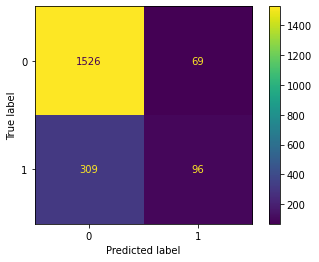

In [122]:
plot_confusion_matrix(lr, x_test, y_test)  

In [123]:
from sklearn.metrics import recall_score,roc_curve,classification_report,roc_auc_score
sensitivity = recall_score(y_test , y_pred)
sensitivity

0.23703703703703705

In [124]:
specificity = recall_score(np.logical_not(y_test) , np.logical_not(y_pred))
specificity

0.9567398119122257

In [125]:
y_pred_proba = lr.predict_proba(x_test)
y_pred_threshold = (y_pred_proba[:,1] >= 0.6)
confusion_matrix(y_test,y_pred_threshold)

array([[1567,   28],
       [ 353,   52]], dtype=int64)

In [126]:
print(y_test[70:75])
print(y_pred_proba[70:75])

      Exited
8711       0
4185       0
4379       0
7813       1
843        1
[[0.25016105 0.74983895]
 [0.89707788 0.10292212]
 [0.9747143  0.0252857 ]
 [0.1677726  0.8322274 ]
 [0.73837975 0.26162025]]


c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


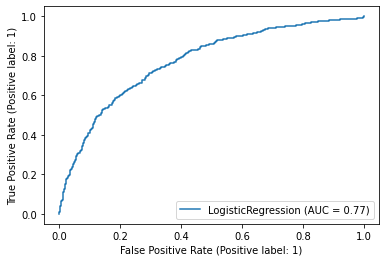

In [127]:
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba[:,1])
# print(fpr)
# print(thresholds)
# print(tpr)
plot_roc_curve(lr, x_test, y_test)

In [128]:
print(fpr)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.26959248e-04
 6.26959248e-04 1.88087774e-03 1.88087774e-03 2.50783699e-03
 2.50783699e-03 3.13479624e-03 3.13479624e-03 4.38871473e-03
 4.38871473e-03 5.01567398e-03 5.01567398e-03 5.64263323e-03
 5.64263323e-03 6.89655172e-03 6.89655172e-03 9.40438871e-03
 9.40438871e-03 1.00313480e-02 1.00313480e-02 1.06583072e-02
 1.06583072e-02 1.12852665e-02 1.12852665e-02 1.19122257e-02
 1.19122257e-02 1.25391850e-02 1.25391850e-02 1.31661442e-02
 1.31661442e-02 1.44200627e-02 1.44200627e-02 1.56739812e-02
 1.56739812e-02 1.69278997e-02 1.69278997e-02 1.75548589e-02
 1.75548589e-02 1.88087774e-02 1.88087774e-02 2.00626959e-02
 2.00626959e-02 2.06896552e-02 2.06896552e-02 2.13166144e-02
 2.13166144e-02 2.19435737e-02 2.19435737e-02 2.25705329e-02
 2.25705329e-02 2.31974922e-02 2.31974922e-02 2.38244514e-02
 2.38244514e-02 2.63322884e-02 2.63322884e-02 2.75862069e-02
 2.75862069e-02 2.82131661e-02 2.82131661e-02 2.88401254e-02
 2.88401254e-02 2.946708

In [129]:
print(tpr)

[0.         0.00246914 0.00740741 0.00740741 0.00987654 0.00987654
 0.01975309 0.01975309 0.03950617 0.03950617 0.04197531 0.04197531
 0.04938272 0.04938272 0.05185185 0.05185185 0.05925926 0.05925926
 0.06419753 0.06419753 0.06666667 0.06666667 0.0691358  0.0691358
 0.07901235 0.07901235 0.08148148 0.08148148 0.09135802 0.09135802
 0.10123457 0.10123457 0.11111111 0.11111111 0.11604938 0.11604938
 0.11851852 0.11851852 0.12592593 0.12592593 0.13580247 0.13580247
 0.1382716  0.1382716  0.15061728 0.15061728 0.15802469 0.15802469
 0.16296296 0.16296296 0.17283951 0.17283951 0.17530864 0.17530864
 0.17777778 0.17777778 0.18024691 0.18024691 0.18271605 0.18271605
 0.18518519 0.18518519 0.18765432 0.18765432 0.19012346 0.19012346
 0.19259259 0.19259259 0.19753086 0.19753086 0.2        0.2
 0.21975309 0.21975309 0.22222222 0.22222222 0.22716049 0.22716049
 0.23209877 0.23209877 0.23703704 0.23703704 0.23950617 0.23950617
 0.24691358 0.24691358 0.25185185 0.25185185 0.25432099 0.25432099
 0.

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(5)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
y_pred = knc.predict(x_test)
y_pred


c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
confusion_matrix(y_test,y_pred)

array([[1496,   99],
       [ 221,  184]], dtype=int64)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1595
           1       0.65      0.45      0.53       405

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [133]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversi

{'n_neighbors': 9}


c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn_9 = KNeighborsClassifier(9)
knn_9.fit(x_train,y_train)
knn_9.score(x_train,y_train)
y_pred = knn_9.predict(x_test)


c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [135]:
confusion_matrix(y_test,y_pred)


array([[1512,   83],
       [ 225,  180]], dtype=int64)

In [136]:
y_pred_proba2 = knn_9.predict_proba(x_test)
fpr2, tpr2, th = roc_curve(y_test,  y_pred_proba2[:,1])

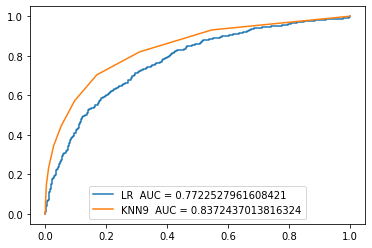

In [137]:
plt.plot(fpr,tpr,label="LR  AUC = {}".format(roc_auc_score(y_test,  y_pred_proba[:,1])))
plt.plot(fpr2,tpr2,label="KNN9  AUC = {}".format(roc_auc_score(y_test,  y_pred_proba2[:,1])))
plt.legend(loc='lower center') 
plt.show()

In [138]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc)

0.7975

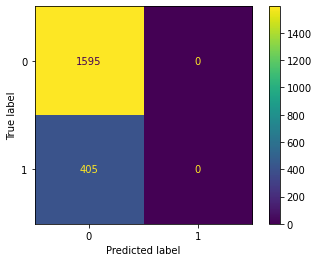

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [141]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [142]:
svc_rbf = SVC(kernel="rbf",probability=True)
svc_rbf.fit(x_train,y_train)
y_pred_svc_rbf = svc_rbf.predict(x_test)

c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [143]:
print(classification_report(y_test,y_pred_svc_rbf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.81      0.46      0.58       405

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



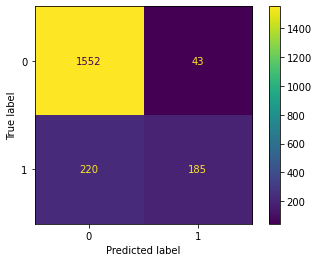

In [144]:
cm=confusion_matrix(y_test,y_pred_svc_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [145]:
y_pred_proba_svc_rbf = svc_rbf.predict_proba(x_test)
fpr_svc_rbf, tpr_svc_rbf, th_svc_rbf = roc_curve(y_test,  y_pred_proba_svc_rbf[:,1])

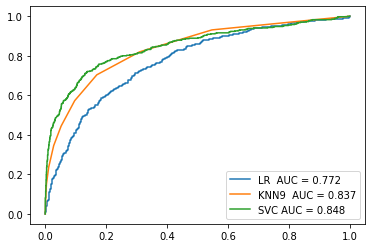

In [151]:
plt.plot(fpr,tpr,label="LR  AUC = {:.3f}".format(roc_auc_score(y_test,  y_pred_proba[:,1])))
plt.plot(fpr2,tpr2,label="KNN9  AUC = {:.3f}".format(roc_auc_score(y_test,  y_pred_proba2[:,1])))
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label="SVC AUC = {:.3f}".format(roc_auc_score(y_test,svc_rbf.predict_proba(x_test)[:,1])))
plt.legend(loc='lower right') 
plt.show()

In [147]:
accuracy_score(y_test,y_pred_svc_rbf)

0.8685

In [224]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
accuracy_score(y_test,y_pred_dtc)

0.81

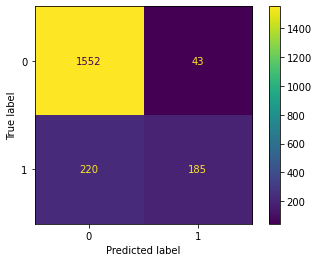

In [201]:
cm=confusion_matrix(y_test,y_pred_svc_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [202]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1595
           1       0.52      0.57      0.54       405

    accuracy                           0.81      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.81      0.81      2000



In [227]:
y_pred_proba_dtc = dtc.predict_proba(x_test)
fpr_dtc, tpr_dtc, th_dtc = roc_curve(y_test,  y_pred_proba_dtc[:,1])

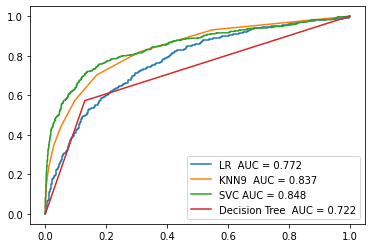

In [228]:
plt.plot(fpr,tpr,label="LR  AUC = {:.3f}".format(roc_auc_score(y_test,  y_pred_proba[:,1])))
plt.plot(fpr2,tpr2,label="KNN9  AUC = {:.3f}".format(roc_auc_score(y_test,  y_pred_proba2[:,1])))
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label="SVC AUC = {:.3f}".format(roc_auc_score(y_test,svc_rbf.predict_proba(x_test)[:,1])))
plt.plot(fpr_dtc,tpr_dtc,label="Decision Tree  AUC = {:.3f}".format(roc_auc_score(y_test,dtc.predict_proba(x_test)[:,1])))
plt.legend(loc='lower right') 
plt.show()

In [241]:
dtc2 = DecisionTreeClassifier(max_depth=3)
dtc2.fit(x_train,y_train)
y_pred_dtc2 = dtc2.predict(x_test)
accuracy_score(y_test,y_pred_dtc2)

0.8425

[Text(0.5, 0.875, 'X[1] <= 0.349\ngini = 0.325\nsamples = 8000\nvalue = [6368, 1632]'),
 Text(0.25, 0.625, 'X[4] <= 1.675\ngini = 0.209\nsamples = 5707\nvalue = [5029, 678]'),
 Text(0.125, 0.375, 'X[4] <= -0.056\ngini = 0.188\nsamples = 5583\nvalue = [4998, 585]'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 2756\nvalue = [2297, 459]'),
 Text(0.1875, 0.125, 'gini = 0.085\nsamples = 2827\nvalue = [2701, 126]'),
 Text(0.375, 0.375, 'X[3] <= -0.845\ngini = 0.375\nsamples = 124\nvalue = [31, 93]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.4375, 0.125, 'gini = 0.149\nsamples = 74\nvalue = [6, 68]'),
 Text(0.75, 0.625, 'X[6] <= 0.5\ngini = 0.486\nsamples = 2293\nvalue = [1339, 954]'),
 Text(0.625, 0.375, 'X[1] <= 1.115\ngini = 0.483\nsamples = 1031\nvalue = [420, 611]'),
 Text(0.5625, 0.125, 'gini = 0.497\nsamples = 692\nvalue = [371, 321]'),
 Text(0.6875, 0.125, 'gini = 0.247\nsamples = 339\nvalue = [49, 290]'),
 Text(0.875, 0.375, 'X[4] <= 1.675\ngini =

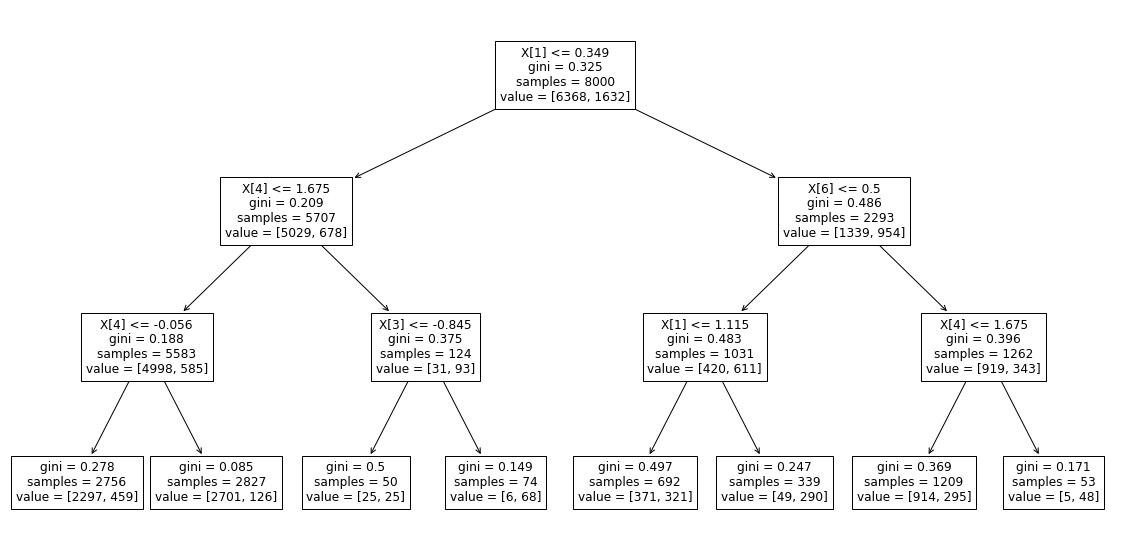

In [249]:
from sklearn import tree
from sklearn.tree import export_graphviz
export_graphviz(dtc2,out_file="decision_tree",feature_names=dtc2.feature_names_in_,)
plt.figure(figsize=(20,10))
tree.plot_tree(dtc2)

In [253]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(500)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
accuracy_score(y_test,y_pred_rfc)

C:\Users\MSI\AppData\Local\Temp\ipykernel_10436\3202047713.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


0.865

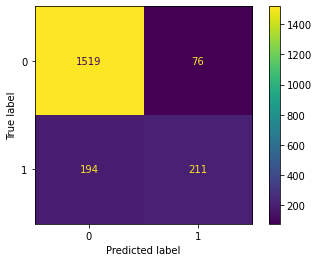

In [254]:
cm=confusion_matrix(y_test,y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [255]:
y_pred_proba_rfc = rfc.predict_proba(x_test)
fpr_rfc, tpr_rfc, th_rfc = roc_curve(y_test,  y_pred_proba_rfc[:,1])

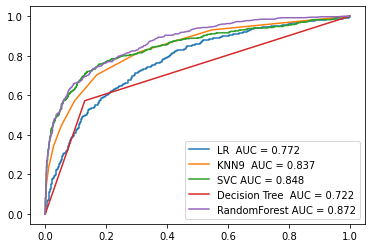

In [258]:
plt.plot(fpr,tpr,label="LR  AUC = {:.3f}".format(roc_auc_score(y_test,  y_pred_proba[:,1])))
plt.plot(fpr2,tpr2,label="KNN9  AUC = {:.3f}".format(roc_auc_score(y_test,  y_pred_proba2[:,1])))
plt.plot(fpr_svc_rbf,tpr_svc_rbf,label="SVC AUC = {:.3f}".format(roc_auc_score(y_test,svc_rbf.predict_proba(x_test)[:,1])))
plt.plot(fpr_dtc,tpr_dtc,label="Decision Tree  AUC = {:.3f}".format(roc_auc_score(y_test,dtc.predict_proba(x_test)[:,1])))
plt.plot(fpr_rfc,tpr_rfc,label="RandomForest AUC = {:.3f}".format(roc_auc_score(y_test,rfc.predict_proba(x_test)[:,1])) )
plt.legend(loc='lower right') 
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

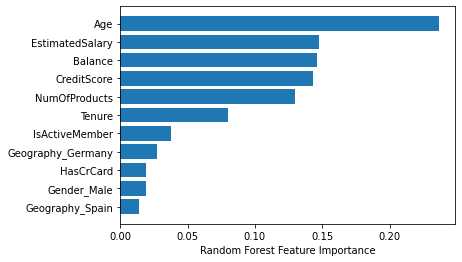

In [261]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(rfc.feature_names_in_[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")